In [1]:
# Logistic Regression from scratch without using any library
# Author: Tushar Mittal (@techytushar)

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
np.random.seed(2)

In [103]:
# Function to calculate the error
def calculate_cost(A,Y,m):
    cost = ((Y*np.log(A)) + ((1-Y)*np.log(1-A)))
    return -np.mean(cost)

In [104]:
# Function to compute gradients
def gradient_descent(X,A,Y,m):
    dZ = (A-Y)
    dW = np.dot(X.T, dZ)/m
    db = np.sum(dZ, axis=0, keepdims=True)/m
    return dW,db

In [105]:
# makes predictions using the parameters
def predict(X,W,b):
    Z = np.dot(X,W)+b
    A = 1/(1+np.exp(-Z))
    return A

In [117]:
# The logistic regression algorithm (prediction -> compute cost -> gradient descent -> update parameters) 
def driver(X, Y, m, n, learning_rate=1.5, n_iter=2000):
    W = np.random.randn(n,1)
    b = np.zeros((1,1))
    costs = []
    for i in range(n_iter):
        A = predict(X,W,b)
        cost = calculate_cost(A,Y,m)
        if i%100==0:
            costs.append(cost)
        dW,db = gradient_descent(X,A,Y,m)
        W = W - (learning_rate*dW)
        b = b - (learning_rate*db)

    return costs, W, b

In [118]:
# data loading and preprocessing
data = load_breast_cancer()
X = data.data
X = normalize(X)
Y = data.target
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.20)
m = X_train.shape[0]
n = X_train.shape[1]
Y_train = Y_train.reshape(m,1)

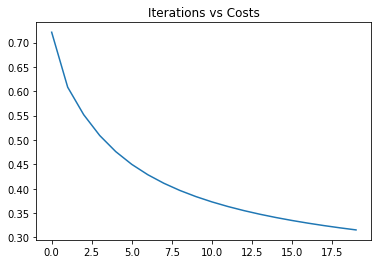

In [119]:
# training the model
costs, W, b = driver(X_train, Y_train, m, n)
plt.plot(np.arange(20),costs)
plt.title("Iterations vs Costs")
plt.show()

In [120]:
# Computing the accuracy
predictions = predict(X_test, W, b)
predictions = np.where(predictions>=0.5, 1, 0)
score = ((Y_test==predictions).sum())/Y_test.shape
print(f"The Logistic Regression model trained with {score[0]}% accuracy")

The Logistic Regression model trained with 60.85964912280702% accuracy
